<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week2/rosenblatt_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Simple perceptron with Rosenblatt training algorithm

1. iterative algorithm with maximum number of epochs:




In [75]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, xi):
        if self.binary:
            return 1 if xi > 0 else 0 if xi < 0 else 0.5
        else:
          return 1 if xi > 0 else -1 if xi < 0 else 0

    def forward(self, inputs):
        potential = np.dot(self.weights, inputs) + self.bias
        return self.activation(potential)

    def rosenblatt(self, training_inputs, true_outputs, epochs=100):
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                self.weights += error * inputs
                self.bias += error
                errors += abs(error) # Accumulate the absolute errors

            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch+1} epochs.")

def sign(x):
    return -1 if x < 0 else 1 if x > 0 else 0

def classification_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)
    #return np.mean(true_outputs != predicted_outputs)

Examples:
- run the training and view the results:
- try to train various logic functions

In [76]:
# Example 1
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]]) # change the number of inputs
true_outputs = np.array([1, 1, 1, -1])  # change the true output values

# train a perceptron:
perceptron = Perceptron(weights=[0, 0], bias=0, binary=False) # change the initial weights

perceptron.rosenblatt(training_inputs, true_outputs, epochs=100)

# print the output:
print(perceptron)
for inputs, label in zip(training_inputs, true_outputs):
  print(f"Input: {inputs}, Predicted: {perceptron.forward(inputs)}, True: {label}")



The training ended after 2 epochs.
Perceptron(weights=[-1 -1], bias=1, binary=False)
Input: [-1 -1], Predicted: 1, True: 1
Input: [-1  1], Predicted: 1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: -1, True: -1


In [77]:
# Example - XOR
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([-1, 1, 1, -1])

# train a perceptron:
perceptron = Perceptron(weights=[1, 0], bias=0, binary=False)  # change the initial weights
perceptron.rosenblatt(training_inputs, true_outputs, epochs=100)

# print the output:
print(perceptron)
for inputs, label in zip(training_inputs, true_outputs):
  print(f"Input: {inputs}, Predicted: {perceptron.forward(inputs)}, True: {label}")

The training ended after 100 epochs.
Perceptron(weights=[1 0], bias=0, binary=False)
Input: [-1 -1], Predicted: -1, True: -1
Input: [-1  1], Predicted: -1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: 1, True: -1


### Visualization of the Rosenblatt training algorithm

In [55]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, xi):
        if self.binary:
            return 1 if xi > 0 else 0 if xi < 0 else 0.5
        else:
          return 1 if xi > 0 else -1 if xi < 0 else 0

    def forward(self, inputs):
        potential = np.dot(self.weights, inputs) + self.bias
        return self.activation(potential)

    def rosenblatt(self, training_inputs, true_outputs, epochs=100):
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)

                if error != 0:
                    # Visualization
                    plt.figure()
                    plt.title(f"Epoch {epoch}, Input: {inputs}, True output: {true_output}, Prediction: {prediction}, Weights: {self.weights} Bias: {self.bias}")
                    new_weights = self.weights + error * inputs
                    plt.quiver([0, 0], [0, 0], self.weights[0], self.weights[1], angles='xy', scale_units='xy', scale=1, color='r', label='Old weights')
                    plt.quiver([0, 0], [0, 0], inputs[0], inputs[1], angles='xy', scale_units='xy', scale=1, color='b', label='Inputs')
                    plt.quiver([0, 0], [0, 0], new_weights[0], new_weights[1], angles='xy', scale_units='xy', scale=1, color='y', label='New weights')
                    plt.xlim(-2, 2)
                    plt.ylim(-2, 2)
                    plt.xlabel("x1")
                    plt.ylabel("x2")
                    plt.legend()
                    plt.grid(True)
                    plt.show()

                self.weights += error * inputs
                self.bias += error
                errors += abs(error) # Accumulate the absolute errors


            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch} epochs.")

def sign(x):
    return -1 if x < 0 else 1 if x > 0 else 0

def classification_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)
    #return np.mean(true_outputs != predicted_outputs)

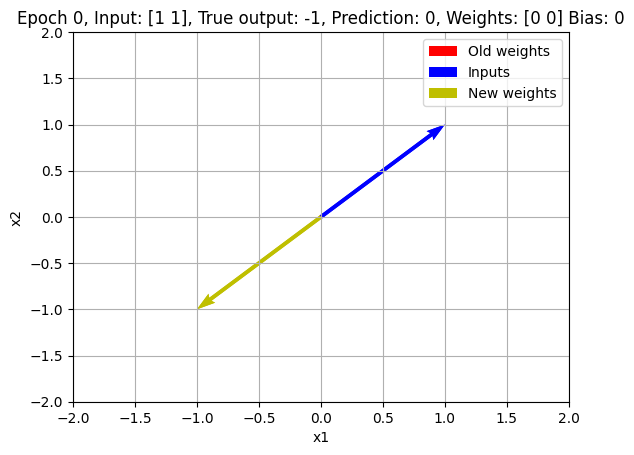

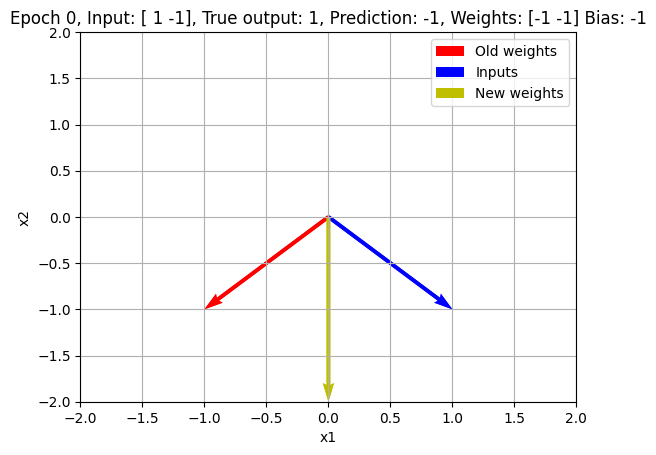

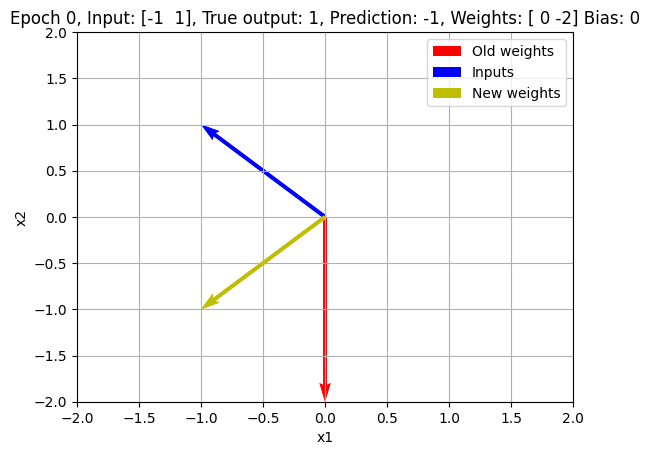

The training ended after 1 epochs.
Perceptron(weights=[-1 -1], bias=1, binary=False)
Input: [-1 -1], Predicted: 1, True: 1
Input: [-1  1], Predicted: 1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: -1, True: -1


In [58]:
# Example 1
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])        # try XOR,...

# train a perceptron:
perceptron = Perceptron(weights=[0, 0], bias=0, binary=False)
perceptron.rosenblatt(training_inputs, true_outputs, epochs=2)

# print the output:
print(perceptron)
for inputs, label in zip(training_inputs, true_outputs):
  print(f"Input: {inputs}, Predicted: {perceptron.forward(inputs)}, True: {label}")

### Batch Rosenblatt Algorithm  that works with matrices:

In [68]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, x):
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias  #Corrected dot product
        return self.activation(potential)

    def rosenblatt_batch(self, training_inputs, true_outputs, epochs=100):
        if epochs > 1:
            print("Rosenblatt batch:")
        else:
            print("Hebbian")
        for epoch in range(epochs):
            predictions = self.forward(training_inputs)
            errors = msign(true_outputs - predictions)

            # Batch update
            # self.weights += np.sum(errors * training_inputs, axis=0)
            self.weights += training_inputs.T @ errors # more efficient: transposition and matrix multiplication
            self.bias += np.sum(errors)

            print(f"Epoch: {epoch} Weights: {self.weights} Bias: {self.bias} {np.sum(np.abs(errors))}")
            if np.sum(np.abs(errors)) == 0:
                break
        print(f"The training ended after {epoch+1} epochs.")
    def hebbian(self, training_inputs, true_outputs):
        return self.rosenblatt_batch(training_inputs, true_outputs, 1)
def msign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

# Example usage
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

perceptron = Perceptron(weights=[0, 0], bias=0, binary=False)
perceptron.rosenblatt_batch(training_inputs, true_outputs, epochs=100)

print(perceptron)
outputs = perceptron.forward(training_inputs)
for i in range(len(training_inputs)):
    print(f"Input: {training_inputs[i]}, Predicted: {outputs[i]}, True: {true_outputs[i]}")


Rosenblatt batch:
Epoch: 0 Weights: [-2 -2] Bias: 2 4
Epoch: 1 Weights: [-2 -2] Bias: 2 0
The training ended after 2 epochs.
Perceptron(weights=[-2 -2], bias=2, binary=False)
Input: [-1 -1], Predicted: 1, True: 1
Input: [-1  1], Predicted: 1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: -1, True: -1


## Hebbian training

In [69]:
perceptron = Perceptron(weights=[0, 0], bias=0, binary=False)
perceptron.hebbian(training_inputs, true_outputs)

print(perceptron)
outputs = perceptron.forward(training_inputs)
for i in range(len(training_inputs)):
    print(f"Input: {training_inputs[i]}, Predicted: {outputs[i]}, True: {true_outputs[i]}")

Hebbian
Epoch: 0 Weights: [-2 -2] Bias: 2 4
The training ended after 1 epochs.
Perceptron(weights=[-2 -2], bias=2, binary=False)
Input: [-1 -1], Predicted: 1, True: 1
Input: [-1  1], Predicted: 1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: -1, True: -1


### Rosenblatt algorithm with learning rate + Rosenblatt with best solution stored


In [100]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights, dtype=float)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, x):
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias  #Corrected dot product
        return self.activation(potential)

    def rosenblatt_batch(self, training_inputs, true_outputs, learning_rate = 1, epochs=100):
        if epochs > 1:
            print("Rosenblatt batch:")
        else:
            print("Hebbian")
        for epoch in range(epochs):
            predictions = self.forward(training_inputs)
            errors = msign(true_outputs - predictions)

            # Batch update
            # self.weights += np.sum(errors * training_inputs, axis=0)
            self.weights += learning_rate * training_inputs.T @ errors # more efficient: transposition and matrix multiplication
            self.bias += learning_rate * np.sum(errors)

            print(f"Epoch: {epoch} Weights: {self.weights} Bias: {self.bias} {np.sum(np.abs(errors))}")
            if np.sum(np.abs(errors)) == 0:
                break
        print(f"The training ended after {epoch+1} epochs.")

    def hebbian(self, training_inputs, true_outputs):
        return self.rosenblatt_batch(training_inputs, true_outputs, 1)

    def rosenblatt_iterative(self, training_inputs, true_outputs, learning_rate = 1, epochs=100):
        print("Rosenblatt iterative:")
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                if (abs(error)):
                    print(f"Epoch: {epoch}, Inputs: {inputs}, Prediction: {prediction} Old weights: {self.weights} {self.bias} New weights: {self.weights+learning_rate*error*inputs} {self.bias+learning_rate*error}")
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
                errors += abs(error) # Accumulate the absolute errors
            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch+1} epochs.")
    def rosenblatt_iterative_best(self, training_inputs, true_outputs, learning_rate = 1, epochs=100):
        print("Rosenblatt iterative + store best solution:")
        min_errors = float('inf')
        best_epoch = -1
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                if (abs(error)):
                    print(f"Epoch: {epoch}, Inputs: {inputs}, Prediction: {prediction} Old weights: {self.weights} {self.bias} New weights: {self.weights+learning_rate*error*inputs} {self.bias+learning_rate*error}")
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
                errors += abs(error) # Accumulate the absolute errors
            if errors < min_errors:
                min_errors = errors
                best_weights = self.weights.copy()
                best_bias = self.bias
                best_epoch = epoch
            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        self.weights = best_weights
        self.bias = best_bias
        print(f"The best solution found in {best_epoch+1} epochs with error {min_errors}.")
        print(f"The training ended after {epoch+1} epochs.")


def msign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

# Example usage
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

perceptron = Perceptron(weights=[0, 0], bias=0, binary=False)
perceptron.rosenblatt_iterative(training_inputs, true_outputs, learning_rate=0.1, epochs=100)
#perceptron.rosenblatt_batch(training_inputs, true_outputs, learning_rate=0.1, epochs=100)


print(perceptron)
outputs = perceptron.forward(training_inputs)
for i in range(len(training_inputs)):
    print(f"Input: {training_inputs[i]}, Predicted: {outputs[i]}, True: {true_outputs[i]}")


Rosenblatt iterative:
Epoch: 0, Inputs: [-1 -1], Prediction: 0 Old weights: [0. 0.] 0 New weights: [-0.1 -0.1] 0.1
The training ended after 2 epochs.
Perceptron(weights=[-0.1 -0.1], bias=0.1, binary=False)
Input: [-1 -1], Predicted: 1, True: 1
Input: [-1  1], Predicted: 1, True: 1
Input: [ 1 -1], Predicted: 1, True: 1
Input: [1 1], Predicted: -1, True: -1


In [97]:
# Example usage: best solution + XOR
training_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([-1, 1, 1, -1])

perceptron = Perceptron(weights=[1, 0], bias=0, binary=False)
perceptron.rosenblatt_iterative_best(training_inputs, true_outputs, learning_rate=0.1, epochs=10)


print(perceptron)
outputs = perceptron.forward(training_inputs)
for i in range(len(training_inputs)):
    print(f"Input: {training_inputs[i]}, Predicted: {outputs[i]}, True: {true_outputs[i]}")


Rosenblatt iterative + store best solution:
Epoch: 0, Inputs: [-1  1], Prediction: -1 Old weights: [1. 0.] 0.0 New weights: [0.9 0.1] 0.1
Epoch: 0, Inputs: [1 1], Prediction: 1 Old weights: [0.9 0.1] 0.1 New weights: [0.8 0. ] 0.0
Epoch: 1, Inputs: [-1  1], Prediction: -1 Old weights: [0.8 0. ] 0.0 New weights: [0.7 0.1] 0.1
Epoch: 1, Inputs: [1 1], Prediction: 1 Old weights: [0.7 0.1] 0.1 New weights: [0.6 0. ] 0.0
Epoch: 2, Inputs: [1 1], Prediction: 1 Old weights: [0.6 0. ] 0.0 New weights: [ 0.5 -0.1] -0.1
Epoch: 2, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.5 -0.1] -0.1 New weights: [0.4 0. ] 0.0
Epoch: 3, Inputs: [1 1], Prediction: 1 Old weights: [0.4 0. ] 0.0 New weights: [ 0.3 -0.1] -0.1
Epoch: 3, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.3 -0.1] -0.1 New weights: [0.2 0. ] 0.0
Epoch: 4, Inputs: [1 1], Prediction: 1 Old weights: [0.2 0. ] 0.0 New weights: [ 0.1 -0.1] -0.1
Epoch: 4, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.1 -0.1] -0.1 New weights: [1.387778

### Vizualize the decision boundary of the perceptron:

Perceptron with weights [-0.1 -0.1] and bias 0.1


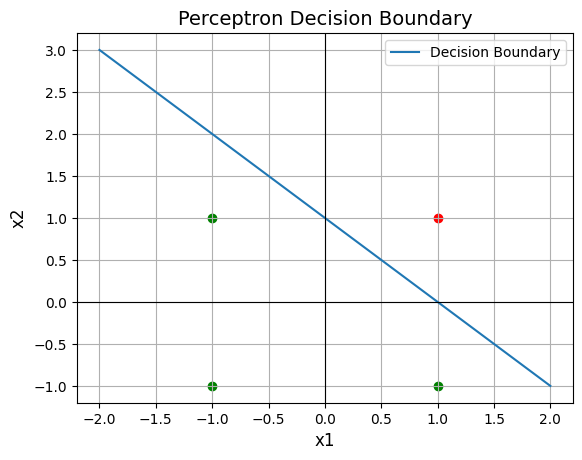

In [101]:
# weights = [1, 1]
# bias = 0
binary = False
p = perceptron

print ("Perceptron with weights", p.weights, "and bias", p.bias)

import matplotlib.pyplot as plt
# Generate points for visualization
x = np.linspace(-2, 2, 100)
y = -(p.weights[0] * x + p.bias) / p.weights[1]

# Plot the decision boundary
plt.plot(x, y, label='Decision Boundary')

# Plot the points (optional)
vals = [0, 1] if binary else [-1, 1]
for i in vals:
  for j in vals:
      out = p.forward(np.array([i,j]))
      if out == 1:
        plt.scatter(i, j, color='green')
      else:
        plt.scatter(i,j, color='red')


plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14)
plt.grid(True)
plt.legend()

#Highlight x and y axes
plt.axhline(0, color='black', linewidth=0.8)  # x-axis
plt.axvline(0, color='black', linewidth=0.8) # y-axis

plt.show()
